<a href="https://colab.research.google.com/github/Freesoul-tech/Louis-Mahobe/blob/main/Classification_irises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of irises**

KNN Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.88      0.64      0.74        11

    accuracy                           0.80        25
   macro avg       0.82      0.78      0.79        25
weighted avg       0.81      0.80      0.79        25

Logistic Regression Report:
               precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.82      0.82      0.82        11

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.89      0.73      0.80        11

    accuracy                           0.84        25
   macro avg       0.85      0.83      0.83

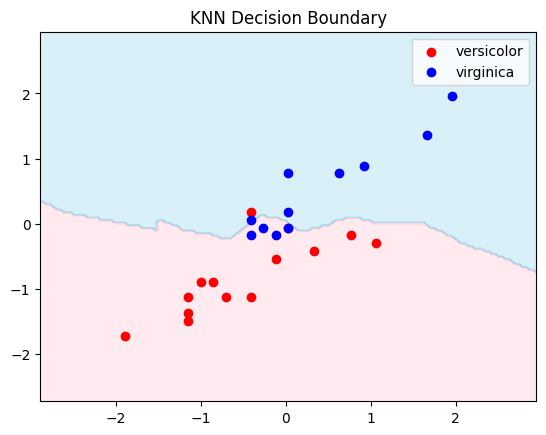

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Binary classification:  (labels 1 and 2)
X = X[y != 0]
y = y[y != 0]

# Split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))


from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_forest))

from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(['pink', 'skyblue'])
    cmap_bold = ['red', 'blue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.04),
                         np.arange(y_min, y_max, 0.04))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    for i, color in enumerate(cmap_bold):
        plt.scatter(X[y == i+1][:, 0], X[y == i+1][:, 1], color=color, label=iris.target_names[i+1])

    plt.title(title)
    plt.legend()
    plt.show()


plot_decision_boundary(X_test, y_test, knn, "KNN Decision Boundary")
